In [81]:
# 第一方案
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings("ignore")

In [103]:
data_file = "Molecular_Descriptor_已删除.xlsx"
data_file = "D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\原始数据\\"+data_file
data  = pd.read_excel(data_file)
d_data = data.iloc[0:,1:]

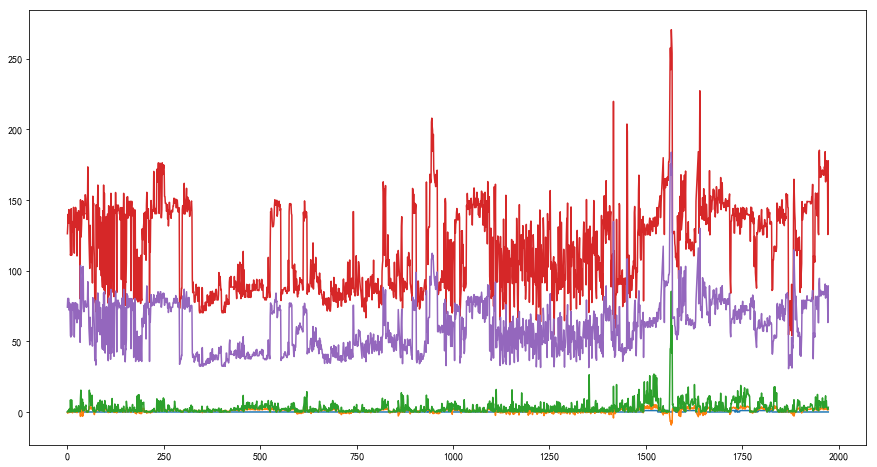

In [131]:
plt.figure(figsize=(15, 8))
data_plot = data[data.columns[:5]]
plt.plot(data_plot)
plt.legend()


plt.savefig("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\Molecular前10特征图.png")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [104]:
from sklearn.preprocessing import StandardScaler
label_data = "ERα_activity_已删除.xlsx"
lable_data = pd.read_excel("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\原始数据\\"+label_data)
lable_data.describe()
Y = lable_data['pIC50']
X = d_data
# 标准化


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
#
scaler = StandardScaler().fit(X)
x_train_f = x_train
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
models=[DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
models_str=['DecisionTree', 'RandomForestRegressor','XGBoost','AdaBoost','GradientBoost']
score_=[]

In [105]:
# 方案2
X.shape
# t1_15 =X[X.columns[70:95]]
t1_15 = X
# t1.shape
t1_15['pIC50'] = Y
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,12))
sns.heatmap(t1_15.corr())

heat = t1_15.corr()
heat.shape
heat1 = pd.DataFrame(heat.pIC50)
heat2 = heat1.sort_values(by="pIC50" , ascending=False)
def abs_corr(x):
    return abs(x)
plt.savefig('D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\全部皮尔逊系数热力图.png')

plt.show()

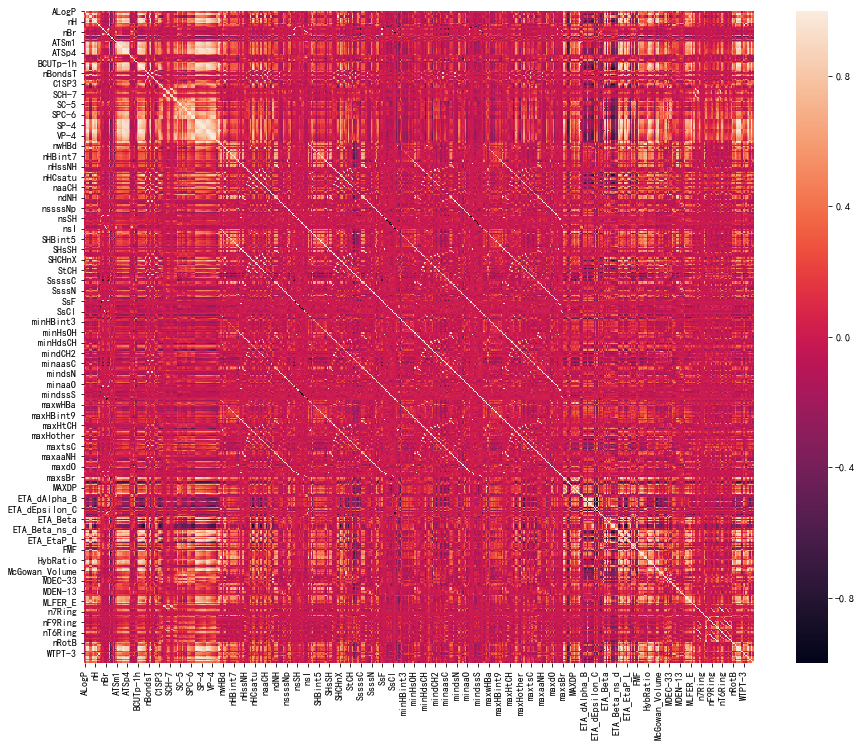

In [112]:

for name,model in zip(models_str,models):
    if name == 'DecisionTree':
        para_dict = {
        'max_depth': [5,8,10,15,20]
        }
    elif name == 'XGBoost':
        para_dict = {
        "max_depth": [5,10,15],
        "min_child_weight" : [1,3,6],
        "n_estimators": [50,100,200],
        "learning_rate": [0.05, 0.1]
        }
    elif name == 'RandomForestRegressor':
        para_dict = {
        "max_depth": [5,10,15],
        "n_estimators": [50,100,200]
        }
    elif name == 'AdaBoost':
        para_dict = {
        "n_estimators": [50,100,200],
        "learning_rate": [0.05, 0.1]
        }
    elif name == 'GradientBoost':
        para_dict = {
        "max_depth": [5,10,15],
        "n_estimators": [50,100,200],
        "learning_rate": [0.05, 0.1,0.16]
        }
    gcv = GridSearchCV(model, para_dict)
    gcv.fit(x_train,y_train)
    gcv_pre = gcv.predict(x_test)
    gcv_score = gcv.score(x_test,y_test)
    gcv_params = gcv.best_params_

    #model_fearture = model.feature_importances_
    print(name +' 最佳得分:'+str(gcv.best_score_ ))
    print(name + " 最佳参数:", gcv_params)
    #print(model_fearture)

In [85]:
model_RFR = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=666)
model_RFR.fit(x_train, y_train)
y_predict = model_RFR.predict(x_test)
model_fearture = model_RFR.feature_importances_
mse_score = MSE(y_test, y_predict)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test, y_predict)
rr_score = r2_score(y_test, y_predict)

print("mse_score:",mse_score,"rmse_score:", rmse_score,"mae_score:", mae_score,"rr_score:", rr_score)

mse_score: 0.5310490943746335 rmse_score: 0.7287311537011668 mae_score: 0.5345392431631151 rr_score: 0.7388603617675973


In [133]:
feature_important_df = pd.DataFrame()
# print(x_train)
# print(x_train.Columns)
feature_important_df["特征名称"] = x_train_f.columns[:729]
feature_important_df["重要指数"] = model_fearture[:729]*5



(1973, 504)

In [135]:
feature_important_df = feature_important_df.sort_values(by=['重要指数'],axis = 0,ascending = False)
feature_important_df.to_excel("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\已处理数据\\随机森林回归模型重要参数选择指数.xlsx", index=False)

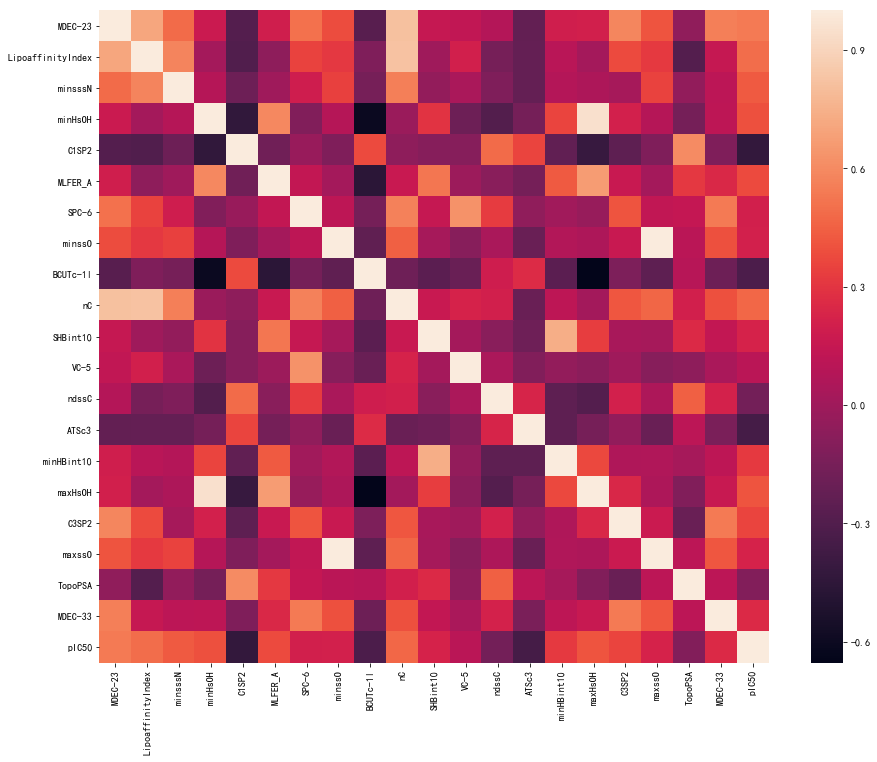

In [142]:
t1 = feature_important_df['特征名称'][:20]

t1_da = pd.DataFrame()
t1_da[t1] = t1_15[t1]

t1_da['pIC50'] = t1_15['pIC50']
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,12))
sns.heatmap(t1_da.corr())
plt.savefig("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\随机森林重要参数热力图.png")

In [ ]:
heat2_abs = abs_corr(heat2)
heat2_abs_a = heat2_abs.index[:100]

f_m = feature_important_df['特征名称'][:100]

In [93]:
# jiaoji=[i for i in heat2_abs_a if i in f_m]
# jiaoji
heat2_abs_a2list = []
for i in heat2_abs_a:
    # print(i)
    heat2_abs_a2list.append(i)

f_m2list = []
for i in f_m:
    # print(i)
    f_m2list.append(i)

jiaoji=[i for i in heat2_abs_a2list if i in f_m2list]
jiaoji[:20]
f = pd.DataFrame()
f['特征名称'] = jiaoji[:20]
feature_important_df.to_excel("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\已处理数据\\皮尔逊系数.xlsx")

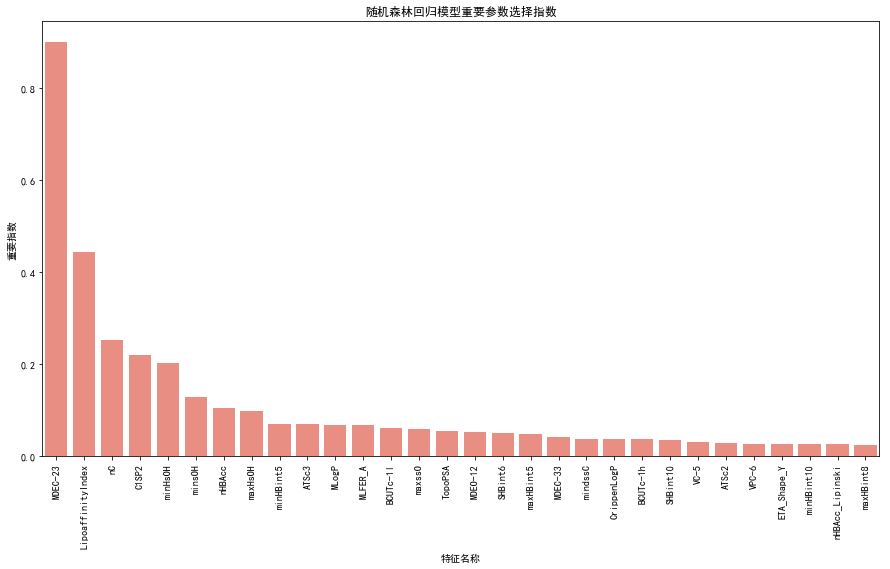

In [90]:
plt.figure(figsize=(15, 8))
#sns.bar(feature_important.index, feature_important.data)
plt.title("随机森林回归模型重要参数选择指数")
sns.barplot(x='特征名称',y='重要指数',color="salmon",data=feature_important_df[:30])
plt.xticks(rotation=90)
plt.savefig('D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\随机森林回归模型重要参数选择指数.png')
plt.show()

In [150]:
model_XGBR = XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=50, random_state=666)
model_XGBR.fit(x_train, y_train)
y_predict = model_XGBR.predict(x_test)
model_fearture = model_XGBR.feature_importances_
mse_score = MSE(y_test, y_predict)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test, y_predict)
rr_score = r2_score(y_test, y_predict)
print(mse_score, rmse_score, mae_score, rr_score)
feature_important_df = pd.DataFrame()
feature_important_df["特征名称"] = x_train_f.columns[:728]
feature_important_df["重要指数"] = model_fearture[:728]*5
feature_important_df = feature_important_df.sort_values(by=['重要指数'],axis = 0,ascending = False)
feature_important_df

0.5110243329663361 0.7148596596300116 0.5151359965622064 0.7495029747521291


,特征名称,重要指数
9,nC,0.629695
438,MDEC-23,0.546804
53,C1SP2,0.283933
287,minssO,0.252418
366,LipoaffinityIndex,0.161061
248,minHsOH,0.149342
314,maxHsOH,0.128684
282,minsssN,0.073152
37,BCUTc-1l,0.070678
214,SdsN,0.069837


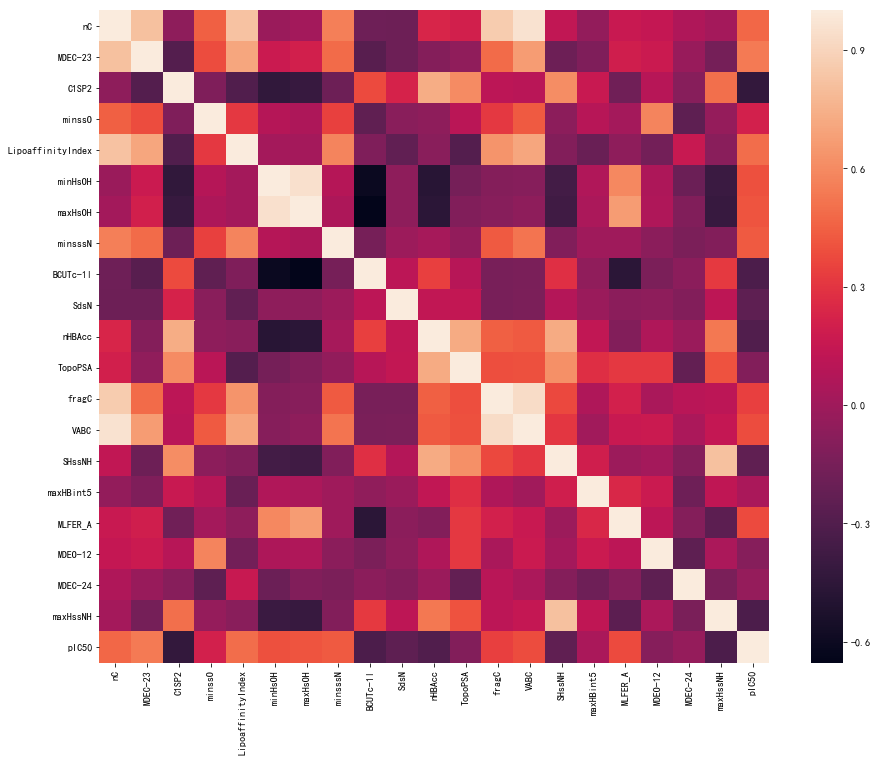

In [151]:
t1 = feature_important_df['特征名称'][:20]
# t1_15 = t1_15[]
# t1.shape
t1_da = pd.DataFrame()
t1_da[t1] = t1_15[t1]

t1_da['pIC50'] = t1_15['pIC50']
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,12))
sns.heatmap(t1_da.corr())
plt.savefig("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\Xgboost重要参数热力图.png")

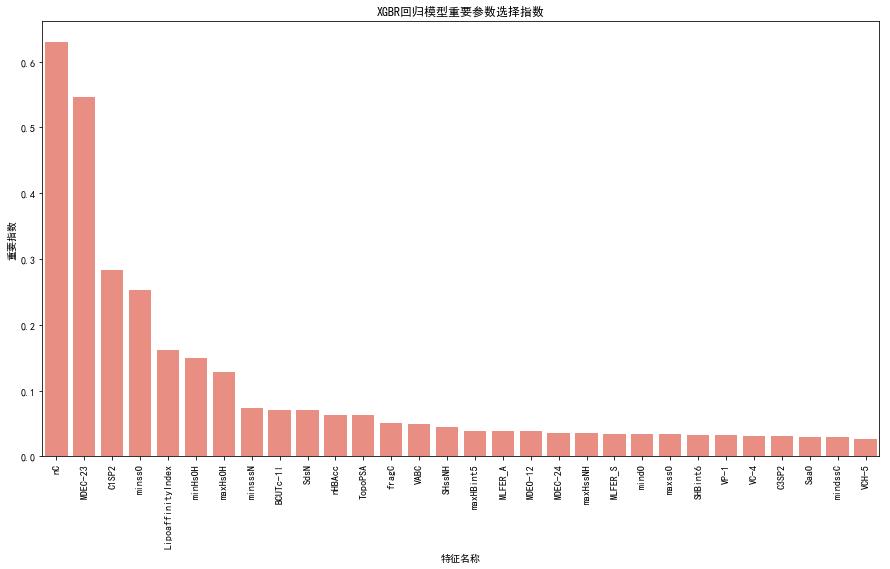

In [152]:
feature_important_df.to_excel("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\已处理数据\\极端梯度提升树XGBoost回归模型重要参数选择指数.xlsx", index=False)
plt.figure(figsize=(15, 8))
#sns.bar(feature_important.index, feature_important.data)
plt.title("XGBR回归模型重要参数选择指数")
sns.barplot(x='特征名称',y='重要指数',color="salmon",data=feature_important_df[:30])
plt.xticks(rotation=90)
plt.savefig('D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\极端梯度提升树XGBoost回归模型重要参数选择指数.png')
plt.show()

In [157]:
model_AdaBR = AdaBoostRegressor(learning_rate=0.1, n_estimators=50, random_state=666)
model_AdaBR.fit(x_train, y_train)
y_predict = model_AdaBR.predict(x_test)
model_fearture = model_AdaBR.feature_importances_
mse_score = MSE(y_test, y_predict)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test, y_predict)
rr_score = r2_score(y_test, y_predict)
print(mse_score, rmse_score, mae_score, rr_score)
feature_important_df = pd.DataFrame()
feature_important_df["特征名称"] = x_train_f.columns[:728]
feature_important_df["重要指数"] = model_fearture[:728]*5
feature_important_df = feature_important_df.sort_values(by=['重要指数'],axis = 0,ascending = False)
feature_important_df = feature_important_df.reset_index(drop=True)
feature_important_df


0.7613749036512278 0.8725679937123685 0.682582031343404 0.626784604647034


,特征名称,重要指数
0,MDEC-23,0.860075
1,LipoaffinityIndex,0.624326
2,minsssN,0.418676
3,minHsOH,0.398763
4,C1SP2,0.192232
5,MLFER_A,0.163203
6,SPC-6,0.154984
7,minssO,0.149624
8,BCUTc-1l,0.128003
9,nC,0.124103


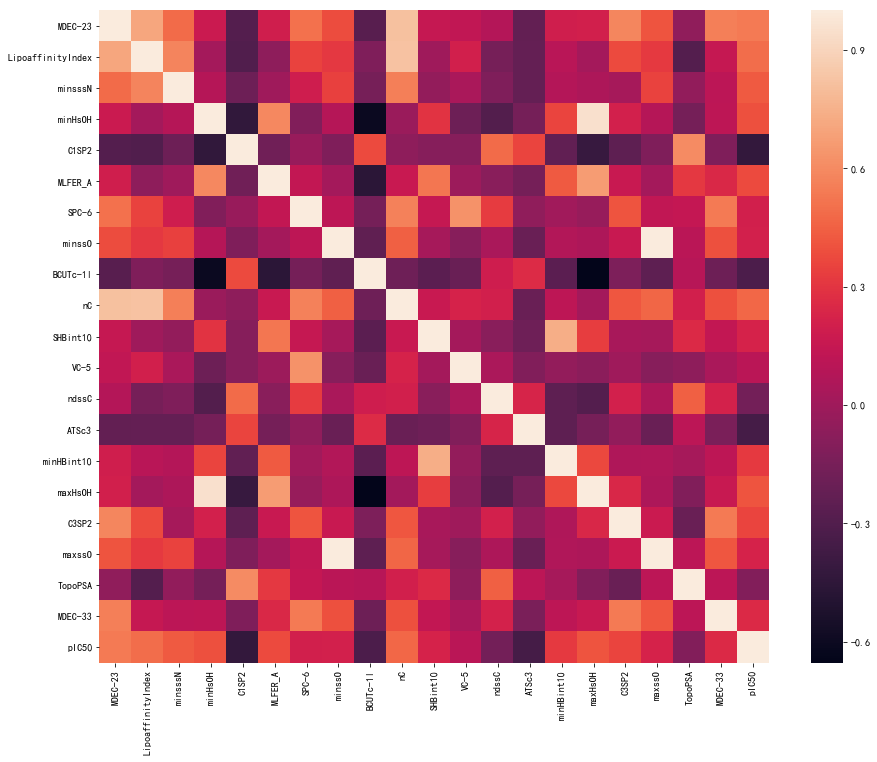

In [159]:
t1 = feature_important_df['特征名称'][:20]
# t1_15 = t1_15[]
# t1.shape
t1_da = pd.DataFrame()
t1_da[t1] = t1_15[t1]

t1_da['pIC50'] = t1_15['pIC50']
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,12))
sns.heatmap(t1_da.corr())
plt.savefig("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\AdaBoost重要参数热力图.png")

In [155]:
feature_important_df.to_excel("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\已处理数据\\AdaBoost回归模型重要参数选择指数.xlsx", index=False)


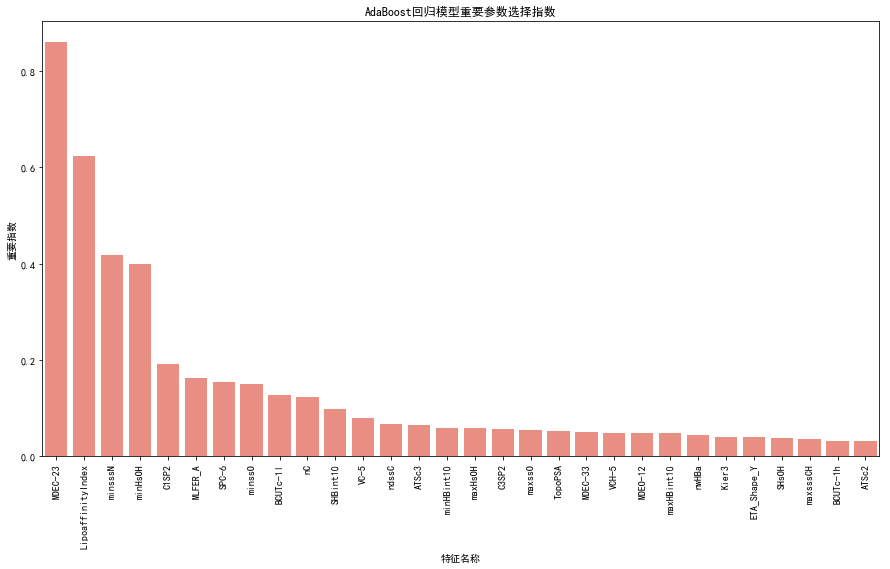

In [156]:
plt.figure(figsize=(15, 8))
#sns.bar(feature_important.index, feature_important.data)
plt.title("AdaBoost回归模型重要参数选择指数")
sns.barplot(x='特征名称',y='重要指数',color="salmon",data=feature_important_df[:30])
plt.xticks(rotation=90)
plt.savefig('D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\AdaBoost回归模型重要参数选择指数.png')

plt.show()

In [115]:
plt.figure(figsize=(15, 8))
#sns.bar(feature_important.index, feature_important.data)
plt.title("AdaBoost回归模型重要参数选择指数")
sns.barplot(x='特征名称',y='重要指数',color="salmon",data=feature_important_df[:30])
plt.xticks(rotation=90)
plt.savefig('D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\AdaBoost回归模型重要参数选择指数.png')

plt.show()

0.7613749036512278 0.8725679937123685 0.682582031343404 0.626784604647034


,特征名称,重要指数
0,MDEC-23,0.860075
1,LipoaffinityIndex,0.624326
2,minsssN,0.418676
3,minHsOH,0.398763
4,C1SP2,0.192232
5,MLFER_A,0.163203
6,SPC-6,0.154984
7,minssO,0.149624
8,BCUTc-1l,0.128003
9,nC,0.124103


In [116]:
feature_important_df.to_excel("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\已处理数据\\AdaBoost回归模型重要参数选择指数.xlsx", index=False)


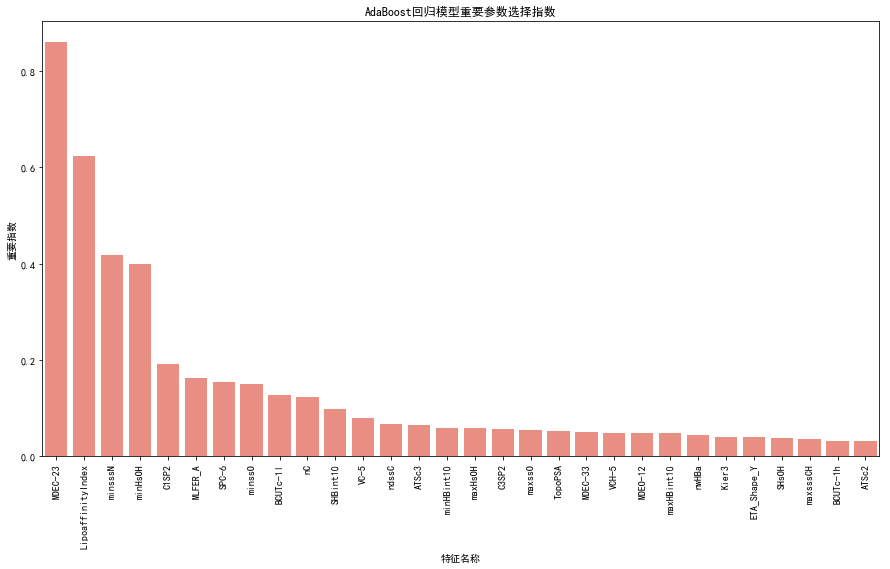

In [117]:
plt.figure(figsize=(15, 8))
#sns.bar(feature_important.index, feature_important.data)
plt.title("AdaBoost回归模型重要参数选择指数")
sns.barplot(x='特征名称',y='重要指数',color="salmon",data=feature_important_df[:30])
plt.xticks(rotation=90)
plt.savefig('D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\AdaBoost回归模型重要参数选择指数.png')

plt.show()

In [27]:
feature_important_df.to_excel("D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\已处理数据\\AdaBoost回归模型重要参数选择指数.xlsx", index=False)


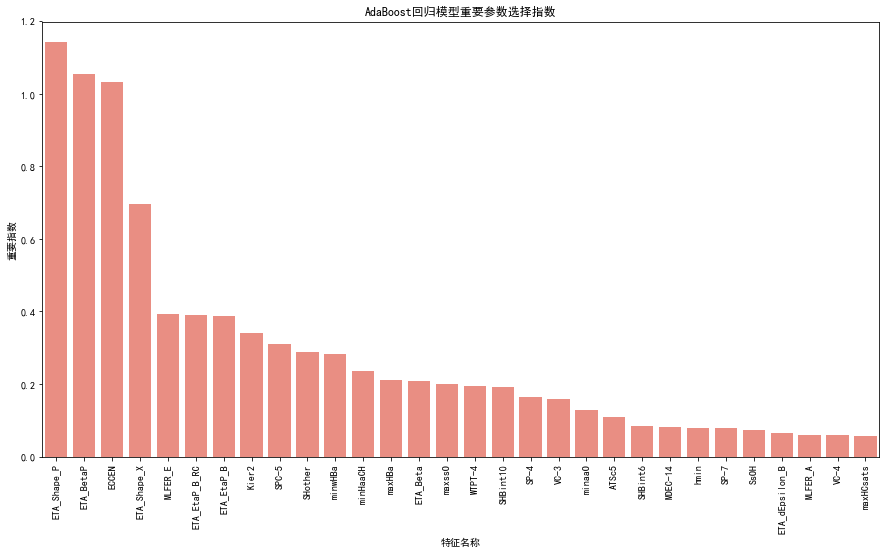

In [41]:
plt.figure(figsize=(15, 8))
#sns.bar(feature_important.index, feature_important.data)
plt.title("AdaBoost回归模型重要参数选择指数")
sns.barplot(x='特征名称',y='重要指数',color="salmon",data=feature_important_df[:30])
plt.xticks(rotation=90)
plt.savefig('D:\\KESHE\\keshe\\gprj\\mathmatical-2021\\第一问\\AdaBoost回归模型重要参数选择指数.png')

plt.show()
